In [4]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams["figure.figsize"] = (6,8)

Load schp parsing

In [5]:
from PIL import Image
parsing_path = "/content/drive/MyDrive/virtual_tryon_project/virtual-tryon/outputs/schp/00005_00.png"

# Load using PIL
parsing_img = Image.open(parsing_path)

# Convert directly to numpy array
parsing = np.array(parsing_img)

print(np.unique(parsing))

[ 0  2  5  9 13 14 15]


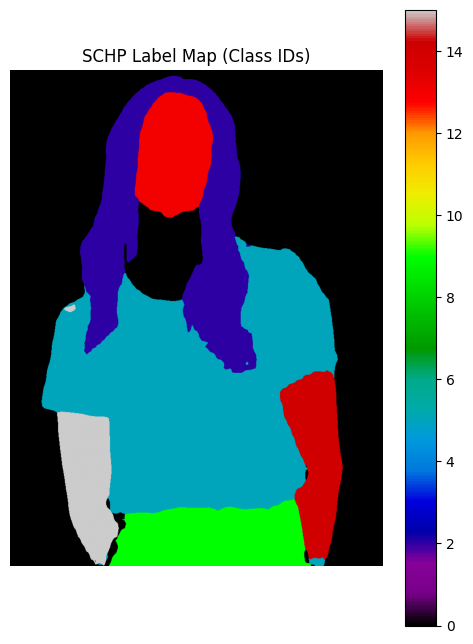

In [6]:
plt.imshow(parsing, cmap="nipy_spectral")
plt.title("SCHP Label Map (Class IDs)")
plt.colorbar()
plt.axis("off")
plt.show()

Load densepose png result

DensePose unique IDs: [ 0  2  3  4  5  6  9 10 15 16 17 18 19 20 21 22 23 24]


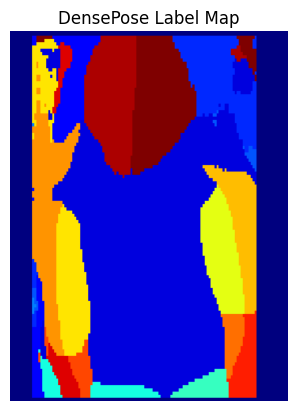

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

DENSEPOSE_PATH = "/content/drive/MyDrive/virtual_tryon_project/virtual-tryon/outputs/densepose/00005_00.png"

densepose_labels = cv2.imread(DENSEPOSE_PATH, cv2.IMREAD_GRAYSCALE)

print("DensePose unique IDs:", np.unique(densepose_labels))

plt.imshow(densepose_labels, cmap="jet")
plt.title("DensePose Label Map")
plt.axis("off")
plt.show()

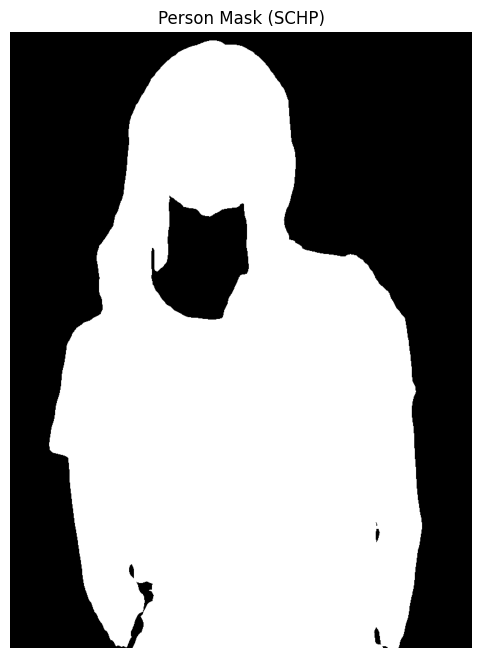

In [18]:
person_mask = parsing != 0 #schp foreground

plt.imshow(person_mask, cmap="gray")
plt.title("Person Mask (SCHP)")
plt.axis("off")
plt.show()

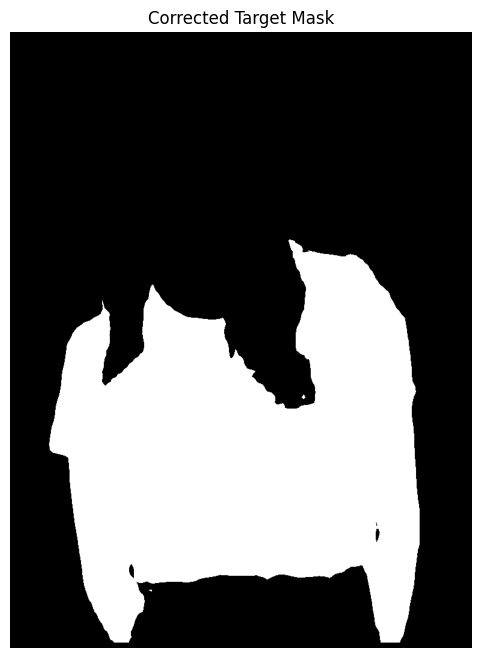

In [19]:
body_mask = (densepose_labels > 0) & person_mask
hair_mask = parsing == 2
face_mask = parsing == 13

lower_body_mask = (
    (parsing == 9) |
    (parsing == 12) |
    (parsing == 10) |
    (parsing == 6)
)

target_mask = body_mask.copy()

target_mask[hair_mask] = 0
target_mask[face_mask] = 0
target_mask[lower_body_mask] = 0

plt.imshow(target_mask, cmap="gray")
plt.title("Corrected Target Mask")
plt.axis("off")
plt.show()

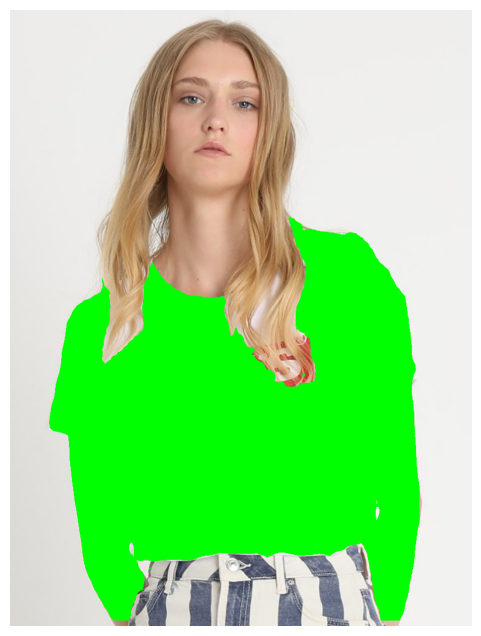

In [22]:
person_pil = Image.open("/content/drive/MyDrive/virtual_tryon_project/data/viton_hd/train/image/00005_00.jpg")
person_np = np.array(person_pil)

overlay = person_np.copy()
overlay[target_mask] = [0,255,0]

plt.imshow(overlay)
plt.axis("off")
plt.show()

In [23]:
output_dir = "/content/drive/MyDrive/virtual_tryon_project/virtual-tryon/outputs/"
output_path = os.path.join(output_dir, "00005_00.png")

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Convert boolean mask to uint8 (0 or 255)
saved_mask = (target_mask * 255).astype(np.uint8)

# Save the mask as a grayscale image
cv2.imwrite(output_path, saved_mask)

print(f"Target mask saved to: {output_path}")

Target mask saved to: /content/drive/MyDrive/virtual_tryon_project/virtual-tryon/outputs/00005_00.png
